# Lale User Study - March 2021 - Lale treatment

Before we start, we load a dataset and print a few rows to see what it looks like.

In [1]:
#load forest covertype data, downsample for faster experiments
import pandas as pd
from lale.datasets import covtype_df
from sklearn.model_selection import train_test_split
from lale.lib.lale import categorical

(train_X_all, train_y_all), (test_X, test_y) = covtype_df(test_size=5000)
train_X, other_X, train_y, other_y = train_test_split(
    train_X_all, train_y_all, train_size=10000, stratify=train_y_all
)
constant_columns = categorical(max_values=1)(train_X)
train_X = train_X.drop(constant_columns, axis=1)
test_X = test_X.drop(constant_columns, axis=1)
pd.options.display.max_columns = None
pd.concat([train_y, train_X], axis=1)

,target,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
46165,3,2571.0,148.0,6.0,285.0,45.0,604.0,228.0,240.0,145.0,825.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28775,1,3225.0,150.0,27.0,210.0,68.0,4130.0,243.0,226.0,93.0,3019.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541272,1,2960.0,45.0,4.0,60.0,11.0,1900.0,221.0,231.0,147.0,2572.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506896,2,2922.0,348.0,12.0,660.0,171.0,977.0,197.0,220.0,161.0,2765.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161908,3,2295.0,110.0,23.0,192.0,44.0,258.0,252.0,208.0,71.0,882.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561965,1,3086.0,25.0,20.0,417.0,43.0,1146.0,206.0,194.0,118.0,2081.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
373727,1,2903.0,100.0,16.0,30.0,1.0,1867.0,245.0,215.0,94.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95912,1,3317.0,275.0,20.0,212.0,41.0,5425.0,162.0,240.0,216.0,860.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
441697,2,2507.0,93.0,22.0,150.0,35.0,589.0,248.0,202.0,72.0,301.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 1. Understand a Pipeline

Consider the following Lale pipeline:

In [2]:
from lale.lib.sklearn import Normalizer
from lale.lib.sklearn import SelectKBest
from lale.lib.sklearn import KNeighborsClassifier
from lale.lib.lale import Project
from lale.lib.lale import categorical
from lale.lib.lale import ConcatFeatures

In [3]:
prepA = Project(drop_columns=categorical(max_values=2)) >> Normalizer()
prepB = Project(columns=categorical(max_values=2)) >> SelectKBest(k=8)
pipeline1 = (prepA & prepB) >> ConcatFeatures >> KNeighborsClassifier()

In [4]:
from sklearn.metrics import accuracy_score
trained1 = pipeline1.fit(train_X, train_y)
print(f"accuracy {accuracy_score(test_y, trained1.predict(test_X)):.1%}")

accuracy 68.7%


Please answer the following questions.

- Q1a: What is the final classifier in the pipeline?
- Q1b: Where does the input for the final classifier come from?
- Q1c: Which columns are subjected to feature selection?
- Q1d: Why do you think the pipeline contains feature selection there?

Handy documentation links:
[Lale API](https://lale.readthedocs.io/en/latest/),
[scikit-learn API](https://scikit-learn.org/stable/modules/classes.html).

In [5]:
# if you'd like to try things out, put your code here

### Answer for Step 1.

- Q1a: (your answer here)
- Q1b: (your answer here)
- Q1c: (your answer here)
- Q1d: (just say your answer, no need to write it down)

## 2. Refine without Search

Create a `pipeline2` that is similar to `pipeline1` from Question 1, except
that instead of Normalizer, it uses a StandardScaler, and
instead of KNeighborsClassifier, it uses a DecisionTreeClassifier with
a maximum depth of 3. Handy documentation links:
[Lale API](https://lale.readthedocs.io/en/latest/),
[scikit-learn API](https://scikit-learn.org/stable/modules/classes.html).

### Answer for Step 2.

In [6]:
# your code here

In [7]:
# reference answer (remove this cell for study participants)
from lale.lib.sklearn import StandardScaler
from lale.lib.sklearn import DecisionTreeClassifier
prepA2 = Project(drop_columns=categorical(max_values=2)) >> StandardScaler()
pipeline2 = (prepA2 & prepB) >> ConcatFeatures >> DecisionTreeClassifier(max_depth=3)
trained2 = pipeline2.fit(train_X, train_y)
print(f"accuracy {accuracy_score(test_y, trained2.predict(test_X)):.1%}")

accuracy 65.7%


### Questions about Step 2.

- Q2a. What documentation did you find the most helpful?
- Q2b. Did your new pipeline work the first time? If not, what went wrong?
- Q2c. What gotchas did you encounter, if any?

## Step 3. Refine with Search

Experiment with a search space of variants of `pipeline1` (from Question 1):

- normalizers: Normalizer, StandardScaler, or neither
- classifiers: LogisticRegression, ExtraTreesClassifier,
  KNeighborsClassifier, or DecisionTreeClassifier

Find the one with the best predictive performance.

### Answer for Step 3.

In [8]:
# your code here

In [9]:
# reference answer (remove this cell for study participants)
from lale.lib.lale import NoOp
from lale.lib.lale import Hyperopt
from lale.lib.sklearn import LogisticRegression
from lale.lib.sklearn import ExtraTreesClassifier

prepA3 = (
    Project(drop_columns=categorical(max_values=2))
    >> (Normalizer | StandardScaler | NoOp)
)
clf = (
    LogisticRegression
    | ExtraTreesClassifier
    | KNeighborsClassifier
    | DecisionTreeClassifier
)
pipeline3 = (prepA3 & prepB) >> ConcatFeatures >> clf

In [10]:
# reference answer (remove this cell for study participants)
trained3 = pipeline3.auto_configure(
    train_X, train_y, cv=3, optimizer=Hyperopt, max_evals=10
)

100%|███████| 10/10 [01:30<00:00,  9.05s/trial, best loss: -0.7181005743045811]


accuracy 72.9%


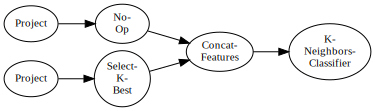

In [11]:
# reference answer (remove this cell for study participants)
print(f"accuracy {accuracy_score(test_y, trained3.predict(test_X)):.1%}")
trained3.visualize()

### Questions about Step 3.

- Q3a. Which pipeline variant lead to the highest accuracy?
- Q3b. What was the accuracy of that pipeline variant?
- Q3c. Did your new pipeline work the first time? If not, what went wrong?
- Q3d. What gotchas did you encounter, if any?
- Q3e. How do you normally search across pipeline variants?

## Step 4. Error Messages

Look at the error message from the following code:

In [12]:
from lale.lib.sklearn import LinearSVC
pipeline4 = SelectKBest(k=15) >> LinearSVC(penalty="l1", loss="hinge")
trained4 = pipeline4.fit(train_X, train_y)
pred_y = trained4.predict(test_X)

ValidationError: Invalid configuration for LinearSVC(penalty='l1', loss='hinge') due to constraint the combination of penalty=`l1` and loss=`hinge` is not supported.
Schema of constraint 1: {
    "description": "The combination of penalty=`l1` and loss=`hinge` is not supported",
    "anyOf": [
        {"type": "object", "properties": {"penalty": {"enum": ["l2"]}}},
        {
            "type": "object",
            "properties": {"loss": {"enum": ["squared_hinge"]}},
        },
    ],
}
Value: {'penalty': 'l1', 'loss': 'hinge', 'dual': True, 'tol': 0.0001, 'C': 1.0, 'multi_class': 'ovr', 'fit_intercept': True, 'intercept_scaling': 1.0, 'class_weight': None, 'verbose': 0, 'random_state': None, 'max_iter': 1000}

Make a small change to the pipeline to avoid that error.

Handy documentation links:
[sklearn docs for LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html),
[Lale docs for LinearSVC](https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.linear_svc.html).

### Answer for Step 4.

In [ ]:
# your code here

In [13]:
# reference answer (remove this cell for study participants)
pipeline4 = SelectKBest(k=15) >> LinearSVC(penalty="l2", loss="hinge")
trained4 = pipeline4.fit(train_X, train_y)
pred_y = trained4.predict(test_X)

### Questions about Step 4.

- Q4a. What caused the error?
- Q4b. Which documentation did you find useful for diagnosing the error?
- Q4c. Was the schema in the error message useful?
- Q4d. How do you normally debug machine learning pipelines?